In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("top_insta_influencers_data.csv")
print(df.shape)
print(df.info())
df.head()


(200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [2]:
replace_dict = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}

columns_to_convert = ['total_likes', 'posts', 'followers',
                      'avg_likes', '60_day_eng_rate', 'new_post_avg_like']

df[columns_to_convert] = df[columns_to_convert].replace(replace_dict, regex=True).astype(float)

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               138 non-null    int64  
 1   channel_info       138 non-null    object 
 2   influence_score    138 non-null    int64  
 3   posts              138 non-null    float64
 4   followers          138 non-null    float64
 5   avg_likes          138 non-null    float64
 6   60_day_eng_rate    138 non-null    float64
 7   new_post_avg_like  138 non-null    float64
 8   total_likes        138 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 11.9+ KB
None


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States


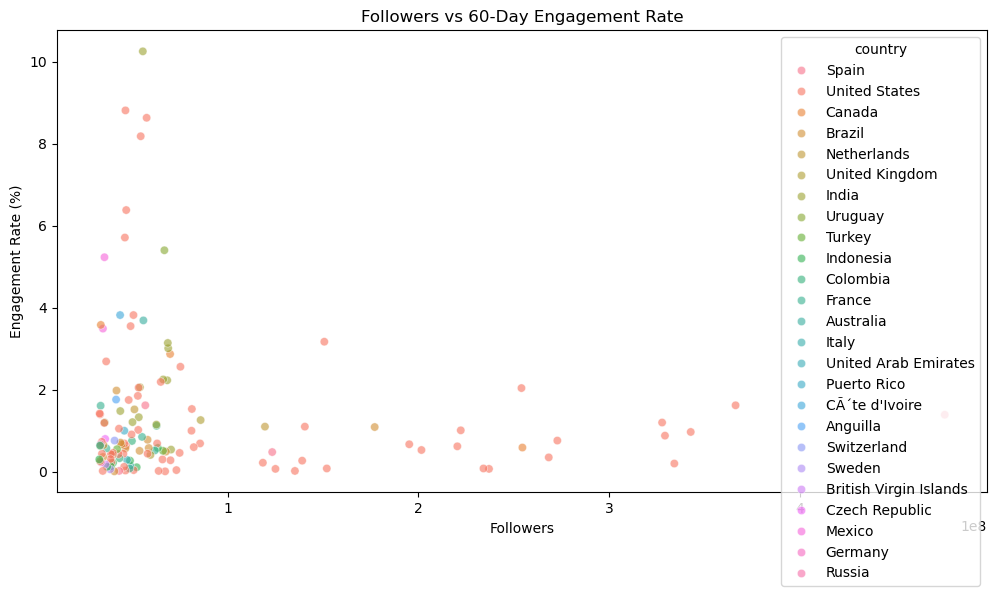

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='followers', y='60_day_eng_rate', alpha=0.6, hue='country')
plt.title("Followers vs 60-Day Engagement Rate")
plt.xlabel("Followers")
plt.ylabel("Engagement Rate (%)")
plt.show()


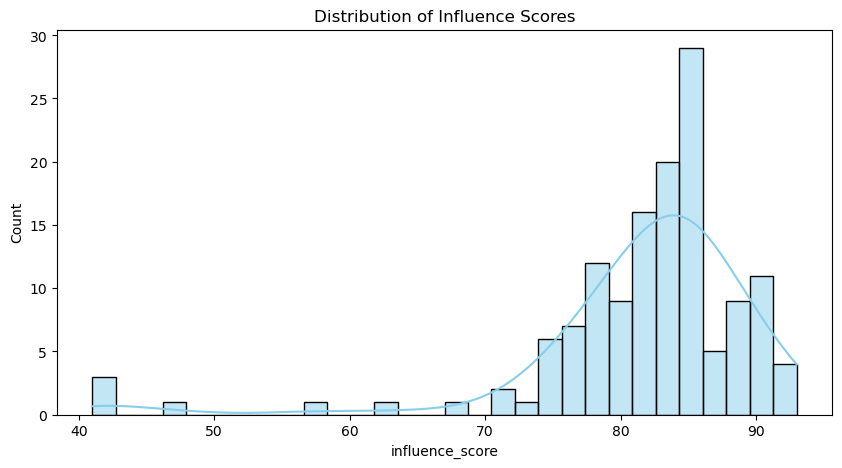

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['influence_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Influence Scores")
plt.show()


C:\Users\Priya K V\AppData\Local\Temp\ipykernel_4824\3764607450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


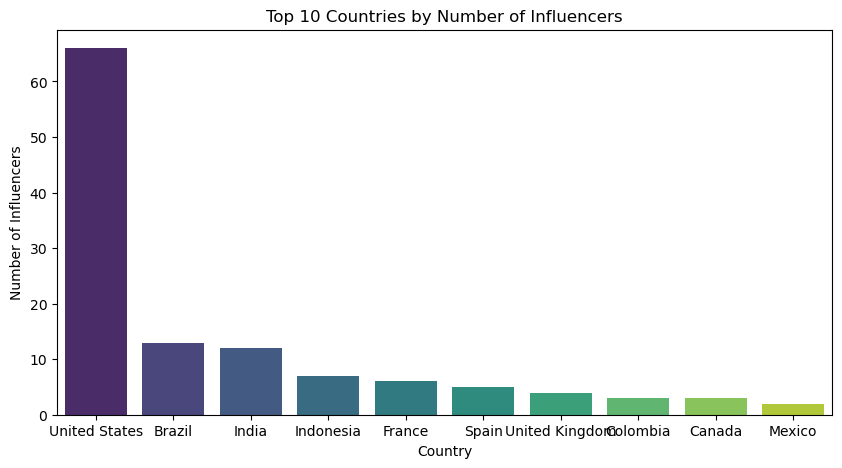

In [5]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Number of Influencers")
plt.xlabel("Country")
plt.ylabel("Number of Influencers")
plt.show()


In [6]:
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']
df['avg_likes_ratio'] = df['avg_likes'] / df['followers']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like',
        'like_follower_ratio', 'post_follower_ratio']]
y = df['influence_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 47.80476785714284
R² Score: -0.8456166839021022


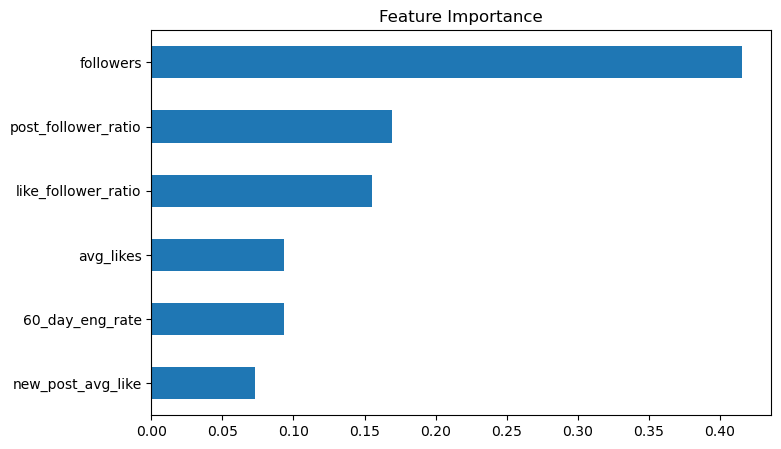

In [8]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5), title="Feature Importance")
plt.show()


In [9]:
bins = [0, 1, 3, df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']
df['engagement_class'] = pd.cut(df['60_day_eng_rate'], bins=bins, labels=labels)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features & target
X = df[['followers', 'influence_score']]
y = df['engagement_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.50      0.92      0.65        13
      Medium       0.67      0.18      0.29        11

    accuracy                           0.50        28
   macro avg       0.39      0.37      0.31        28
weighted avg       0.49      0.50      0.41        28

